<a href="https://colab.research.google.com/github/kangyoon115/blog/blob/gh-pages/2022_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%AD%EB%85%84_%EC%BA%A0%ED%8D%BC%EC%8A%A4_%ED%86%B5%EA%B3%84_%EA%B8%B0%EB%B0%98_%EB%B6%84%EC%84%9D_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 기본 통계

- Iris dataset을 이용하여 데이터의 수, 평균, 중앙값 등, 기초적인 통계를 수행하는 방법을 확인
- 딥러닝의 경우, 대부분 Numpy 형태의 데이터를 사용하지만, 통계적인 활용에 있어서는 Pandas의 Series나 DataFrame이 편리
- 이를 위해 type casting 등을 이용하여 Pandas와 Iris dataset을 이용한 기초 통계 및 시각화를 학습




- [Iris (붓꽃) 품종 데이터] - petal은 꽃잎, sepal은 꽃받침

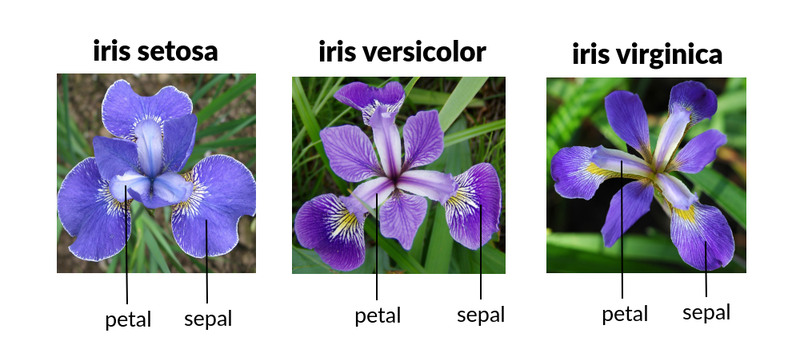

## 기본 통계를 통한 데이터 확인

- 데이터 준비

In [7]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# DESCR-description 세부정보 출력 가능
# print(iris_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
# Numpy->PANDAS로 변형
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target) #열을 추가하는 기능


# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))


# 생성된 DataFrame의 형태 확인 -> Iris dataset shape: (150, 5) 
print("\nIris dataset shape:", iris_df.shape, "\n")


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(iris_df.head(20)) #상위에 있는 데이터들을 보여줌. 기본 5개->display(iris_df.head()) or 내가 지정해서 원하는 데이터 만큼 실행 가능 20개->display(iris_df.head(20))
display(iris_df.tail())


Iris dataset shape: (150, 5) 

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


- 데이터 수 확인

In [2]:
# 결측치 즉,누락된 정보나 잘못된 데이터 같은 경우 NaN같은 형태로 나와서 결론도출에 영향을 줄 수 있음.
# 데이터 수 - 사전 정보를 활용한 방법
print("\n[데이터의 수 출력]")
for idx, f_name in enumerate(iris_dataset.feature_names):
    print("[Dict]", f_name + "의 데이터 수는", iris_df[f_name].count())

# 데이터의 수 - DataFrame 정보를 활용한 방법
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 데이터 수는", iris_df[f_name].count())

print("[인덱스 기준]\n", iris_df.count(axis = 'index'))   # index가 기본 설정값
print("[컬럼 기준]\n", iris_df.count(axis = 'columns'))   # NaN은 세지 않음

# 특정 값을 지닌 데이터의 수 - DataFrame 정보를 활용한 방법
print(iris_df[iris_df.columns[-1]].value_counts())
# print(iris_df['target'].value_counts())


[데이터의 수 출력]
[Dict] sepal length (cm)의 데이터 수는 150
[Dict] sepal width (cm)의 데이터 수는 150
[Dict] petal length (cm)의 데이터 수는 150
[Dict] petal width (cm)의 데이터 수는 150
[DF] sepal length (cm)의 데이터 수는 150
[DF] sepal width (cm)의 데이터 수는 150
[DF] petal length (cm)의 데이터 수는 150
[DF] petal width (cm)의 데이터 수는 150
[인덱스 기준]
 sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64
[컬럼 기준]
 0      5
1      5
2      5
3      5
4      5
      ..
145    5
146    5
147    5
148    5
149    5
Length: 150, dtype: int64
setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64


- 평균과 중앙값

In [3]:
# 평균 - DataFrame 정보를 활용한 방법
print("\n[데이터의 평균값 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 평균값은", iris_df[f_name].mean())

print(iris_df.mean())

# 중앙값 - DataFrame 정보를 활용한 방법
print("\n[데이터의 중앙값 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 중앙값은", iris_df[f_name].median())

print(iris_df.median())


[데이터의 평균값 출력]
[DF] sepal length (cm)의 평균값은 5.843333333333334
[DF] sepal width (cm)의 평균값은 3.0573333333333337
[DF] petal length (cm)의 평균값은 3.7580000000000005
[DF] petal width (cm)의 평균값은 1.1993333333333336
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

[데이터의 중앙값 출력]
[DF] sepal length (cm)의 중앙값은 5.8
[DF] sepal width (cm)의 중앙값은 3.0
[DF] petal length (cm)의 중앙값은 4.35
[DF] petal width (cm)의 중앙값은 1.3
sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  del sys.path[0]


- 최소값, 최대값, 최빈값

In [8]:
# 최소값 - DataFrame 정보를 활용한 방법
print("\n[데이터의 최소값 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 최소값은", iris_df[f_name].min())

print(iris_df.min())


# 최대값 - DataFrame 정보를 활용한 방법
print("\n[데이터의 최대값 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 최대값은", iris_df[f_name].max())

print(iris_df.max())


# 최빈값 - DataFrame 정보를 활용한 방법
print("\n[데이터의 최빈값 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 최빈값은\n", iris_df[f_name].mode())

print(iris_df.mode(axis = 'index'))


[데이터의 최소값 출력]
[DF] sepal length (cm)의 최소값은 4.3
[DF] sepal width (cm)의 최소값은 2.0
[DF] petal length (cm)의 최소값은 1.0
[DF] petal width (cm)의 최소값은 0.1
sepal length (cm)       4.3
sepal width (cm)        2.0
petal length (cm)       1.0
petal width (cm)        0.1
target               setosa
dtype: object

[데이터의 최대값 출력]
[DF] sepal length (cm)의 최대값은 7.9
[DF] sepal width (cm)의 최대값은 4.4
[DF] petal length (cm)의 최대값은 6.9
[DF] petal width (cm)의 최대값은 2.5
sepal length (cm)          7.9
sepal width (cm)           4.4
petal length (cm)          6.9
petal width (cm)           2.5
target               virginica
dtype: object

[데이터의 최빈값 출력]
[DF] sepal length (cm)의 최빈값은
 0    5.0
dtype: float64
[DF] sepal width (cm)의 최빈값은
 0    3.0
dtype: float64
[DF] petal length (cm)의 최빈값은
 0    1.4
1    1.5
dtype: float64
[DF] petal width (cm)의 최빈값은
 0    0.2
dtype: float64
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.0               3.0                1.4             

- 분산, 표준편차, 왜도, 첨도

In [9]:
# 분산 - DataFrame 정보를 활용한 방법
print("\n[데이터의 분산 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 분산은", iris_df[f_name].var())

print(iris_df.var())


# 표준 편차 - DataFrame 정보를 활용한 방법
print("\n[데이터의 표준편차 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 표준편차는", iris_df[f_name].std())

print(iris_df.std())


# 표준 편차 - 분산을 이용한 표준 편차 계산
#import math   # 제곱근 함수 sqrt를 사용하는 경우 필요
print("\n[데이터의 표준편차 출력] - 분산을 직접 활용")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 제곱근(표준 편차)은", iris_df[f_name].var()**(1/2))
    # print("[DF]", f_name + "의 제곱근(표준 편차)은", math.sqrt(iris_df[f_name].var()))


# 비대칭도 - DataFrame 정보를 활용한 방법
# 데이터가 왼쪽이나 오른쪽으로 치우쳐져 나타나는 경우 왜도-skew()를 사용하여 데이터가 치우쳐진 정도를 출력
print("\n[데이터의 비대칭도(왜도(skewness)) 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 비대칭도(왜도)는", iris_df[f_name].skew())

print(iris_df.skew())


# 첨도(kurtosis) - DataFrame 정보를 활용한 방법
# 첨도는 분산,표준편차를 봤을 때 중간에 데이터가 많이 모여있을 수록 그래프가 뾰족해짐. 즉, 이 첨도는 중앙에 데이터가 얼마나 모여져있는지를 알려주는 함수
print("\n[데이터의 첨도 출력]")
for f_name in iris_df.columns[:-1]:
    print("[DF]", f_name + "의 첨도는", iris_df[f_name].kurt())

print(iris_df.kurt())


[데이터의 분산 출력]
[DF] sepal length (cm)의 분산은 0.6856935123042507
[DF] sepal width (cm)의 분산은 0.189979418344519
[DF] petal length (cm)의 분산은 3.116277852348993
[DF] petal width (cm)의 분산은 0.5810062639821029
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64

[데이터의 표준편차 출력]
[DF] sepal length (cm)의 표준편차는 0.828066127977863
[DF] sepal width (cm)의 표준편차는 0.4358662849366982
[DF] petal length (cm)의 표준편차는 1.7652982332594662
[DF] petal width (cm)의 표준편차는 0.7622376689603465
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

[데이터의 표준편차 출력] - 분산을 직접 활용
[DF] sepal length (cm)의 제곱근(표준 편차)은 0.828066127977863
[DF] sepal width (cm)의 제곱근(표준 편차)은 0.4358662849366982
[DF] petal length (cm)의 제곱근(표준 편차)은 1.7652982332594662
[DF] petal width (cm)의 제곱근(표준 편차)은 0.7622376689603465

[데이터의 비대칭도(왜도(skewness)) 출력]
[DF] sepal length (cm)의 비대칭도(왜도)는 0.314910956636

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None'

- Pandas의 자동 요약

In [10]:
# DataFrame에 대한 속성 요약 정보 출력
print("\n[데이터 속성 요약 정보]")
print(iris_df.info())


# DataFrame에 대한 통계 요약 정보 자동 출력
print("\n[데이터 통계 요약 정보]")
print(iris_df.describe())


[데이터 속성 요약 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

[데이터 통계 요약 정보]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             

## 시각화를 통한 데이터 확인
- Pandas와 Iris dataset을 이용한 Histogram, Box Plot, Pair Plot을 생성하는 방법의 예제
- 특히, Pandas의 시각화를 돕는 seaborn을 이용한 시각화 방법을 학습함

- 데이터 준비

In [11]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# DataFrame을 이용한 시각화를 돕는 seaborn
import seaborn as sns 

# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)

# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target)

# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))


# DataFrame에 대한 속성 요약 정보 출력
print("\n[데이터 속성 요약 정보]")
print(iris_df.info())

# DataFrame에 대한 요약 정보 자동 출력
print("\n[데이터 요약 정보]")
print(iris_df.describe())

# NaN 등 결측값 확인
print("[결측값 확인]\n", iris_df.isnull().sum())

# # 결측치가 존재하는 행을 삭제
# iris_df.dropna(axis = 0, inplace = True)


[데이터 속성 요약 정보]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

[데이터 요약 정보]
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.4

- 히스토그램 생성

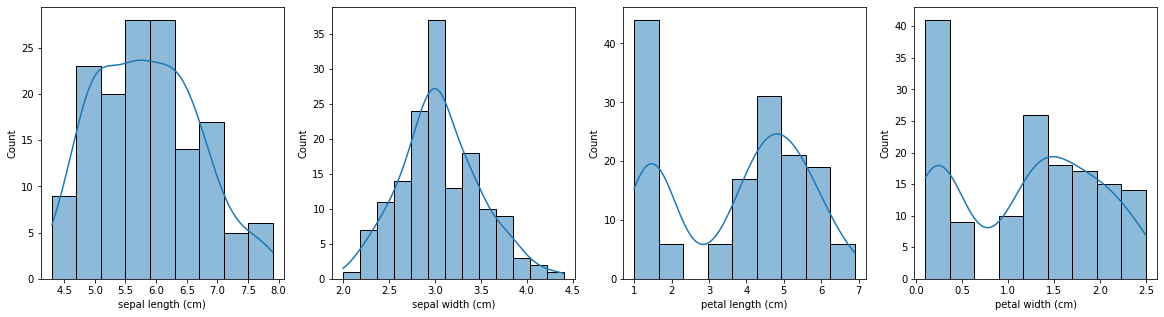


[히스토그램을 통한 데이터 확인]



In [12]:
# DataFrame과 seaborn을 이용한 히스토그램 생성
fig, ax = plt.subplots(1,4, figsize = (20, 5))

# for idx, _ in enumerate(iris_dataset.feature_names):  # 사전 정보를 활용한 방법
for idx, f_name in enumerate(iris_df.columns[:-1]):   # DataFrame 정보를 활용한 방법
    sns.histplot(iris_df[f_name], kde = True, ax = ax[idx])   # KDE(Kernel Density Estimation)를 통해 커널 밀도를 나타내는 선을 함께 표기
plt.show()

print("\n[히스토그램을 통한 데이터 확인]\n")

- 박스 플롯 생성

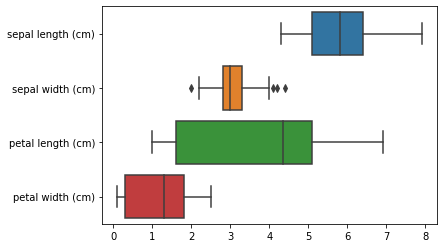


[박스 플롯을 통한 데이터 확인]



In [13]:
# DataFrame과 seaborn을 이용한 박스플롯 생성
sns.boxplot(data = iris_df, orient = "h")
plt.show()

print("\n[박스 플롯을 통한 데이터 확인]\n")

# sns.boxplot(data = iris_df['petal width (cm)'])
# plt.show()

박스플롯을 사용하면 데이터의 기본적인 특성을 한번에 확인하기가 용이하다.

- 페어 플롯 생성

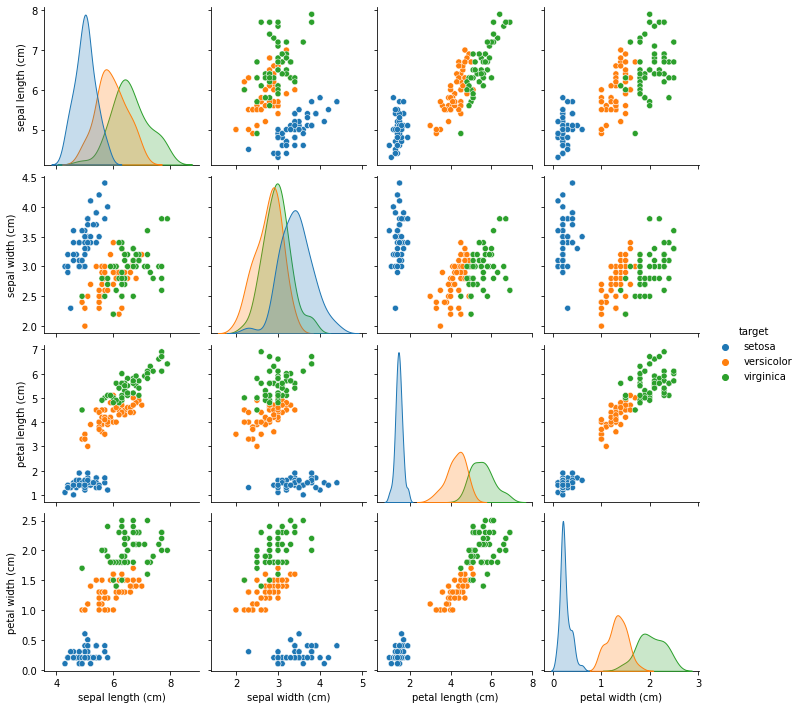


[페어 플롯을 통한 데이터 확인]



In [14]:
# DataFrame과 seaborn을 이용한 Pair plot 생성
sns.pairplot(iris_df, hue = 'target')
plt.show()

print("\n[페어 플롯을 통한 데이터 확인]\n")

페어플롯을 통해 sepal lenngth를 가지고 분석하는 것이 용이하다는 것을 한눈에 알아 볼 수 있다. 
* 박스플롯과 페어플롯을 통해 데이터를 한눈에 먼저 본 뒤에 어떤 것을 진행하는 것이 용이

## 기초 통계 연습 문제
- 주어진 Wine Recognition Dataset을 이용하여 학습한 기초 통계 내용을 확인

In [15]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# Wine data 로드 (Scikit-learn Bunch type)
wine_dataset = datasets.load_wine()
# print(type(wine_dataset))

# Scikit을 통해 제공되는 diabetes data의 세부 정보 출력
print(wine_dataset.DESCR)

"""-------------------------------------------------------------------------------------------------"""
# 데이터 준비



"""-------------------------------------------------------------------------------------------------"""
# 데이터 수 확인



"""-------------------------------------------------------------------------------------------------"""
# 평균값



"""-------------------------------------------------------------------------------------------------"""
# 중앙값



"""-------------------------------------------------------------------------------------------------"""
# 최소값



"""-------------------------------------------------------------------------------------------------"""
# 최대값



"""-------------------------------------------------------------------------------------------------"""
# 최빈값



"""-------------------------------------------------------------------------------------------------"""
# 분산



"""-------------------------------------------------------------------------------------------------"""
# 표준편차



"""-------------------------------------------------------------------------------------------------"""
# 왜도



"""-------------------------------------------------------------------------------------------------"""
# 첨도



"""-------------------------------------------------------------------------------------------------"""
# 데이터 속성 요약



"""-------------------------------------------------------------------------------------------------"""
# 데이터 통계 요약



"""-------------------------------------------------------------------------------------------------"""
# Histogram



"""-------------------------------------------------------------------------------------------------"""
# Box Plot



"""-------------------------------------------------------------------------------------------------"""
# Pair Plot




.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

'-------------------------------------------------------------------------------------------------'

# 통계적 가설 검정(Statistical Hypothesis Test)
- 통계적 가설 검정에서 널리 사용되는 t-검정과 교차 검정을 통해 통계적 연관성을 확인
- 가설 검정의 경우, Scipy를 통해 제공되고 있는 stats의 기능들을 활용하는 방법들을 확인

## 독립 2표본 t-검정

- 타이타닉 생존 데이터셋을 이용한 t-검정
- 데이터 속성

> 0. Survived Indicator (0 사망 / 1 생존)
1. Passenger Class (객실 등급 - 1~3등석)
2. Name (이름)
3. Sex (성별)
4. Age (나이)
5. Siblings Aboard (동승인원)
6. Parents Aboard  (동승인원)
7. Fare paid in £s (객실 가격)

- 데이터 전처리

In [ ]:
import pandas as pd
# 검정 실시를 위한 scipy의 stats 호출
from scipy import stats


# 타이타닉 생존자 관련 데이터셋
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

print("[데이터 속성 요약]\n", titanic_df.info())

print("[데이터 통계 요약]\n", titanic_df.describe())

print("[컬럼 목록]\n", titanic_df.columns)


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(titanic_df.head())


# 생존자와 비생존자로 분할
titanic_survivor = titanic_df[titanic_df.Survived == 1]
titanic_non_survivor = titanic_df[titanic_df.Survived == 0]

print("\n[생존자 통계]\n", titanic_survivor.describe())
print("\n[사망자 통계]\n", titanic_non_survivor.describe())


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
sns.pairplot(titanic_df, hue = 'Survived')
plt.show()

- 정규성 검정 (p-value < 0.05) (귀무가설: 주어진 데이터가 정규 분포를 따른다)

In [ ]:
# Step 1. 정규성 검정
shapiroTestResult = stats.shapiro(titanic_survivor['Age'])
print("Shapiro 정규성 검정 결과 - titanic_survivor['Age']")
print(shapiroTestResult, "\n")

for f_name in titanic_df.columns:
    if titanic_survivor[f_name].dtype != type(str):
        print("Shapiro 정규성 검정 결과 (statistic, p-value) - " + f_name)
        print("titanic_survivor:\t", stats.shapiro(titanic_survivor[f_name]))
        print("titanic_non_survivor:\t", stats.shapiro(titanic_non_survivor[f_name]))
        print("\n")

- 등분산 검정 (등분산의 귀무가설: 두 집단이 등분산이다, 따라서 p-value > 0.05)

In [ ]:
# Step 2. 등분산 검정
leveneTestResult = stats.levene(titanic_survivor['Age'], titanic_non_survivor['Age'])
print("Levene 정규성 검정 결과 - Age")
print(leveneTestResult, "\n")

for f_name in titanic_df.columns:
    if titanic_survivor[f_name].dtype != type(str):
        print("\nLevene 정규성 검정 결과 -", f_name, "\n", stats.levene(titanic_survivor[f_name], titanic_non_survivor[f_name]))


# 등분산 / 이분산 단순 확인
print("\n[속성별 등분산/이분산 현황]\n")
for f_name in titanic_df.columns:
    if titanic_survivor[f_name].dtype != type(str) and stats.levene(titanic_survivor[f_name], titanic_non_survivor[f_name]).pvalue > 0.05:
        print(f_name, ": 등분산\n")
    elif titanic_survivor[f_name].dtype != type(str):
        print(f_name, ": 이분산\n")

- 독립 t-검정  (p-value < 0.05) (귀무가설: 두 집단의 평균 차이는 없다)
 - 등분산과 이분산에 따라 옵션을 달리 줘야함

In [ ]:
# Step 3. 독립 t-검정 실시 
tTestResult = stats.ttest_ind(titanic_survivor['Age'], titanic_non_survivor['Age'], equal_var = True)
print("독립 t-검정 결과 -", "Age")
print(tTestResult)

for f_name in titanic_df.columns:
    if titanic_survivor[f_name].dtype != type(str) and f_name in ['Age', 'Siblings/Spouses Aboard']:
        print("\n독립 t 검정 결과 (등분산) -", f_name, "\n", 
              stats.ttest_ind(titanic_survivor[f_name], titanic_non_survivor[f_name], equal_var = True))
    elif titanic_survivor[f_name].dtype != type(str):
        print("\n독립 t 검정 결과 (이분산) -", f_name, "\n", 
              stats.ttest_ind(titanic_survivor[f_name], titanic_non_survivor[f_name], equal_var = False))

## 교차 검정 - 이원 카이 제곱 검정

- 타이타닉 생존 데이터셋을 이용한 이원 카이 제곱 교차 검정
- 데이터 속성

> 0. Survived Indicator (0 사망 / 1 생존)
1. Passenger Class (객실 등급 - 1~3등석)
2. Name (이름)
3. Sex (성별)
4. Age (나이)
5. Siblings Aboard (동승인원)
6. Parents Aboard  (동승인원)
7. Fare paid in £s (객실 가격)

- 데이터 전처리

In [ ]:
import pandas as pd
# 검정 실시를 위한 scipy의 stats 호출
from scipy import stats


# 타이타닉 생존자 관련 데이터셋
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

print("[데이터 속성 요약]\n", titanic_df.info())
print("[데이터 통계 요약]\n", titanic_df.describe())

print("[컬럼 목록]\n", titanic_df.columns)


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(titanic_df.head())


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
sns.pairplot(titanic_df, hue = 'Survived')
plt.show()

- 이원 카이 제곱 검정 실시 (귀무가설 - 두 변수 사이에는 관계가 없다)

In [ ]:
# 객실 등급에 따른 생존 여부
print("\n[Survived - Pclass]")
target = pd.crosstab(titanic_df["Survived"], titanic_df["Pclass"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nChi2 value = {}\nP-value = {}\nDegree of Freedom = {}\nExpected value = {}".format(chi2, p, dof, ex)) 

# Chi2 value의 검증은 카이 제곱 분포표를 이용하여 Chi2 value가 표보다 크거나 같은지 확인
# display(pd.DataFrame(ex))   # 입력된 croostab과 동일한 형태로 기대값 출력

# 성별에 따른 생존 여부
print("\n[Survived - Sex]")
target = pd.crosstab(titanic_df["Survived"], titanic_df["Sex"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nChi2 value = {}\nP-value = {}\nDegree of Freedom = {}\nExpected value = {}".format(chi2, p, dof, ex)) 


# 나이에 따른 생존 여부
print("\n[Survived - Age]")
target = pd.crosstab(titanic_df["Survived"], titanic_df["Age"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nChi2 value = {}\nP-value = {}\nDegree of Freedom = {}\nExpected value = {}".format(chi2, p, dof, ex)) 


# 형제 또는 배우자 탑승수에 따른 생존 여부
print("\n[Survived - Siblings/Spouses Aboard]")
target = pd.crosstab(titanic_df["Survived"], titanic_df["Siblings/Spouses Aboard"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nChi2 value = {}\nP-value = {}\nDegree of Freedom = {}\nExpected value = {}".format(chi2, p, dof, ex)) 


# 부모 또는 자녀 탑승에 따른 생존 여부
print("\n[Survived - Parents/Children Aboard]")
target = pd.crosstab(titanic_df["Survived"], titanic_df["Parents/Children Aboard"])
display(target)
chi2, p, dof, ex = stats.chi2_contingency(target, correction = False)
print("\nChi2 value = {}\nP-value = {}\nDegree of Freedom = {}\nExpected value = {}".format(chi2, p, dof, ex)) 

## 통계 검정 연습 문제
- 미국의 인종과 정당 사이의 관계 확인
- 출처 : https://www.kaggle.com/code/hamelg/python-for-data-25-chi-squared-tests/notebook

In [ ]:
"""-------------------------------------------------------------------------------------------------"""
# 데이터 준비
# Sample data randomly at fixed probabilities
voter_race = np.random.choice(a= ["asian", "black", "hispanic", "other", "white"],
                              p = [0.05, 0.15 , 0.25, 0.05, 0.5],
                              size = 1000)

# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size = 1000)

voters = pd.DataFrame({"race": voter_race, 
                       "party": voter_party})

voter_tab = pd.crosstab(voters.race, voters.party)

display(voter_tab)



"""-------------------------------------------------------------------------------------------------"""
# 데이터 속성 및 통계 요약



"""-------------------------------------------------------------------------------------------------"""
# 정규성 검정



"""-------------------------------------------------------------------------------------------------"""
# 등분산 검정



"""-------------------------------------------------------------------------------------------------"""
# 독립 t-검정



"""-------------------------------------------------------------------------------------------------"""
# 이원 카이 제곱 교차 검정




# 분산 분석(Analysis of Variance, ANOVA)

## One-way ANOVA

- 출처: https://users.stat.ufl.edu/~winner/data/laptopcolor_attract.csv

- 데이터 준비

In [ ]:
"""
Dataset: laptopcolor_attract.csv
Source: H. Lin (2014). "Red-Colored Products Enhance the Attractiveness of omen," Displays, Vol. 35, pp. 202-205.

Description:
 Results of experiments where males (1) and females (2) rated the attractiveness (on a 5-point Likert scale with 1=Lowest, 5=Highest)  of a female holding a laptop computer in one of 4 colors in a photograph: 
 Red (1), Black (2), Silver (3), Blue (4).
 80 males with 20 per color in a Completely Randomized Design
 80 females "  "   "    "   "  "     "          "        "

Variables:
 gender   (1=M, 2=F)
 color    (1=Red, 2=Black, 3=Silver, 4=Blue)
"""
# https를 이용하여 데이터 다운로드 받는 경우 ssl 인증 실시
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
# 분산 분석 실시를 위한 scipy의 stats 호출
from scipy import stats

# 노트북 색상 평가 관련 데이터셋
url = "https://users.stat.ufl.edu/~winner/data/laptopcolor_attract.csv"
color_df = pd.read_csv(url)

print("[데이터 속성 요약]\n", color_df.info())
print("[데이터 통계 요약]\n", color_df.describe())

print("[컬럼 목록]\n", color_df.columns)


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(color_df.head())
# display(color_df)


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
sns.pairplot(color_df)
# sns.pairplot(color_df, hue = 'gender')
# sns.pairplot(color_df, hue = 'color')
# sns.pairplot(color_df, hue = 'attractive')
plt.show()

- 일원 분산분석 (귀무가설: 모집단 평균이 동일하다)
- 단 독립성(각 그룹의 데이터는 서로 독립) / 정규성(각 그룹의 데이터는 정규분포) / 등분산성(그룹들의 분산은 동일)을 만족하는 경우

In [ ]:
# 독립 변수 gender   (1=M, 2=F)
m_df = color_df[color_df['gender'] == 1].drop(['gender'], axis = 'columns')
f_df = color_df[color_df['gender'] == 2].drop(['gender'], axis = 'columns')
print(m_df.columns)

# stats.f_oneway의 경우, 2개에 대해서도 연산 지원
# print(stats.ttest_ind(m_df, f_df))
F_statistic, p_value = stats.f_oneway(m_df, f_df)
print('gender를 이용한 일원 분산분석 결과 : F={}, p={}\n\n'.format(F_statistic, p_value))

# 독립 변수 color (1=Red, 2=Black, 3=Silver, 4=Blue)
red_df = color_df[color_df['color'] == 1].drop(['color'], axis = 'columns')
black_df = color_df[color_df['color'] == 2].drop(['color'], axis = 'columns')
silver_df = color_df[color_df['color'] == 3].drop(['color'], axis = 'columns')
blue_df = color_df[color_df['color'] == 4].drop(['color'], axis = 'columns')
print(red_df.columns)

F_statistic, p_value = stats.f_oneway(red_df, black_df, silver_df, blue_df)
print('color를 이용한 일원 분산분석 결과 : F={}, p={}\n\n'.format(F_statistic, p_value))

# 독립 변수 attractive (min = 2, max = 5)
s2_df = color_df[color_df['attractive'] == 2].drop(['attractive'], axis='columns')
s3_df = color_df[color_df['attractive'] == 3].drop(['attractive'], axis='columns')
s4_df = color_df[color_df['attractive'] == 4].drop(['attractive'], axis='columns')
s5_df = color_df[color_df['attractive'] == 5].drop(['attractive'], axis='columns')
print(s2_df.columns)

F_statistic, p_value = stats.f_oneway(s2_df, s3_df, s4_df, s5_df)
print('attractive를 이용한 일원 분산분석 결과 : F={}, p={}\n\n'.format(F_statistic, p_value))


# 일원분산 및 이원분산 등 통계 관련 작업을 편하게 지원하는 statmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

# perform one-way ANOVA
# 카테고리 속성은 C(이름)으로 표기, 그렇지 않은 경우 이름만 표기

# 독립 변수 gender
model = ols('attractive ~ gender', data=color_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ=2)
print("\n[독립 변수 - gender]\n", tway)

# 독립 변수 color
model = ols('attractive ~ C(color)', data=color_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ=2)
print("\n[독립 변수 - color]\n",tway)

# 독립 변수 attractive
model = ols('color ~ C(attractive)', data=color_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ=2)
print("\n[독립 변수 - attractive]\n",tway)

## Two-way ANOVA
- 출처: https://users.stat.ufl.edu/~winner/data/laptopcolor_attract.csv

- 데이터 준비

In [ ]:
"""
Dataset: laptopcolor_attract.csv
Source: H. Lin (2014). "Red-Colored Products Enhance the Attractiveness of omen," Displays, Vol. 35, pp. 202-205.

Description:
 Results of experiments where males (1) and females (2) rated the attractiveness (on a 5-point Likert scale with 1=Lowest, 5=Highest)  of a female holding a laptop computer in one of 4 colors in a photograph: 
 Red (1), Black (2), Silver (3), Blue (4).
 80 males with 20 per color in a Completely Randomized Design
 80 females "  "   "    "   "  "     "          "        "

Variables:
 gender   (1=M, 2=F)
 color    (1=Red, 2=Black, 3=Silver, 4=Blue)
"""
# https를 이용하여 데이터 다운로드 받는 경우 ssl 인증 실시
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

# 노트북 평가 관련 데이터셋
url = "https://users.stat.ufl.edu/~winner/data/laptopcolor_attract.csv"
color_df = pd.read_csv(url)

print("[데이터 속성 요약]\n", color_df.info())
print("[데이터 통계 요약]\n", color_df.describe())

print("[컬럼 목록]\n", color_df.columns)


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(color_df.head())


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
# sns.pairplot(color_df)
sns.pairplot(color_df, hue = 'gender')
# sns.pairplot(color_df, hue = 'color')
# sns.pairplot(color_df, hue = 'attractive')
plt.show()

- 이원 분산 분석 

> (귀무가설: 1. 독립 변수에 따른 종속 변수의 평균 차이는 없다. 2. 종속 변수에 대한 두 독립 변수의 상호 작용은 없다)

In [ ]:
# 일원분산 및 이원분산 등 통계 관련 작업을 편하게 지원하는 statmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('attractive ~ C(gender) + C(color)', data = color_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ = 2)

print(tway)

#perform two-way ANOVA w/ 상호작용
model = ols('attractive ~ C(gender) * C(color)', data = color_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ = 2)

print(tway)

## ANOVA 연습 문제
- 관측자에 따른 머리 둘레 측정 오차 확인해보기
- 출처: https://users.stat.ufl.edu/~winner/data/skull_measure.csv

In [ ]:
"""
Dataset: skull_measure.csv

Source: T. Hanihara, Y. Dodo, O. Kondo, T. Nara, N. Doi, N. Sensui (1999).
"Intra- and Inter-Observer Errors in Facial Flatness Measurements,"
Anthropological Science, Vol. 107, #1, pp. 25-39.

Description: Measurements made on 10 skulls by 6 observers at two times (times are replicates, not a factor).

Variable Names:
observer
skull
time
chord   (frontal chord measurement) : 측정치
"""

"""-------------------------------------------------------------------------------------------------"""
# 데이터 준비

# https를 이용하여 데이터 다운로드 받는 경우 ssl 인증 실시
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
# 분산 분석 실시를 위한 scipy의 stats 호출
from scipy import stats
import statsmodels.stats.anova as anova

# 머리 둘레 측정 데이터셋
url = 'https://users.stat.ufl.edu/~winner/data/skull_measure.csv'
skull_df = pd.read_csv(url)


"""-------------------------------------------------------------------------------------------------"""
# 데이터 속성 및 통계 요약

print("[데이터 속성 요약]\n", skull_df.info())
print("[데이터 통계 요약]\n", skull_df.describe())

print("[컬럼 목록]\n", skull_df.columns)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(skull_df.head())
# display(skull_df)


"""-------------------------------------------------------------------------------------------------"""
# Statsmodels를 이용하여 일원 및 이원 분산 분석(ANOVA) 실시

#perform two-way ANOVA
model = ols('chord ~ C(observer) * C(skull)', data = skull_df).fit()
# print(model.summary())
tway = sm.stats.anova_lm(model, typ = 2)

print(tway)

# 상관 분석(Correlation Analysis)


- 데이터 전처리

- 타이타닉 생존 데이터셋을 이용한 상관 분석
- 데이터 속성

> 0. Survived Indicator (0 사망 / 1 생존)
1. Passenger Class (객실 등급 - 1~3등석)
2. Name (이름)
3. Sex (성별)
4. Age (나이)
5. Siblings Aboard (동승인원)
6. Parents Aboard  (동승인원)
7. Fare paid in £s (객실 가격)

In [ ]:
import pandas as pd
# 검정 실시를 위한 scipy의 stats 호출
from scipy import stats


# 타이타닉 생존자 관련 데이터셋
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
titanic_df = pd.read_csv(url)

print("[데이터 속성 요약]\n", titanic_df.info())
print("[데이터 통계 요약]\n", titanic_df.describe())

print("[컬럼 목록]\n", titanic_df.columns)

print("[결측값 확인]\n", titanic_df.isnull().sum())

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(titanic_df.head())

# 성별의 카테고리값을 수치로 변경
titanic_df["Sex"] = titanic_df['Sex'].astype('category').cat.codes   # male: 1 / female: 0

display(titanic_df.head())


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
sns.pairplot(titanic_df, hue = 'Survived')
plt.show()

- 피어슨 상관 분석

In [ ]:
corr_result = titanic_df.corr(method='pearson')
print(corr_result)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(corr_result)

import seaborn as sb
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(corr_result,
           annot = True,   # 실제 값 출력
           cmap = 'Blues',  # 히트맵 색상
           vmin = -1, vmax = 1)   # 색상표 값 범위 -1 ~ +1

- 두 집단 사이의 상관도 분석

> 귀무가설 - 두 집단의 상관성은 0이다

> 대립가설 - 두 집단의 통계는 유의미한 상관을 갖는다

In [ ]:
# 생존자와 비생존자로 분할 및 샘플링 수행
titanic_df_samples = titanic_df.drop(['Name'], axis=1)
titanic_survivor = titanic_df_samples[titanic_df.Survived == 1].sample(n=300)
titanic_non_survivor = titanic_df_samples[titanic_df.Survived == 0].sample(n=300)

# print("\n[생존자 통계]\n", titanic_survivor.describe())
# print("\n[사망자 통계]\n", titanic_non_survivor.describe())


import scipy.stats
import seaborn as sb
# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display

empty_df = pd.DataFrame()
empty_non_df = pd.DataFrame()

for f_name in titanic_survivor.columns:
    print("\n두 집단 사이의 상관도 비교 (Pearson’s correlation coefficient, P-value) - ", f_name, "w/ Fare")
    corr_result = scipy.stats.pearsonr(titanic_survivor[f_name], titanic_survivor['Fare'])
    print("Survived -", corr_result)
    corr_non_result = scipy.stats.pearsonr(titanic_non_survivor[f_name], titanic_non_survivor['Fare'])
    print("Non-Survived -", corr_non_result)
    empty_df[f_name] = corr_result
    empty_non_df[f_name] = corr_non_result

display(empty_df)
display(empty_non_df)

print("[Survived]")
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(empty_df,
           annot = True,   # 실제 값 출력
           cmap = 'Blues',  # 히트맵 색상
           vmin = -1, vmax = 1)   # 색상표 값 범위 -1 ~ +1
plt.show()


print("[Non-Survived]")
plt.rcParams["figure.figsize"] = (5,5)
sb.heatmap(empty_non_df,
           annot = True,   # 실제 값 출력
           cmap = 'Blues',  # 히트맵 색상
           vmin = -1, vmax = 1)   # 색상표 값 범위 -1 ~ +1
plt.show()

## 상관 분석 연습 문제
- Iris 데이터를 이용한 상관 분석

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# DataFrame을 이용한 시각화를 돕는 seaborn
import seaborn as sns 

"""-------------------------------------------------------------------------------------------------"""
# 데이터 준비

# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)

# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target)

# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))

print("[컬럼 목록]\n", iris_df.columns)


"""-------------------------------------------------------------------------------------------------"""
# 데이터 속성 및 통계 요약

# DataFrame에 대한 속성 요약 정보 출력
print("\n[데이터 속성 요약 정보]")
print(iris_df.info())

# DataFrame에 대한 요약 정보 자동 출력
print("\n[데이터 요약 정보]")
print(iris_df.describe())

# NaN 등 결측값 확인
print("[결측값 확인]\n", iris_df.isnull().sum())


"""-------------------------------------------------------------------------------------------------"""
# 피어슨 상관 분석을 통해 속성별 상관도 계산



"""-------------------------------------------------------------------------------------------------"""
# 피어슨 상관 분석을 통해 품종별 상관도 계산




# 회귀 분석 (Regression Analysis)

## 단순 선형 회귀

- 데이터 준비

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# diabetes(당뇨) data 로드 (Scikit-learn Bunch type)
diabetes_dataset = datasets.load_diabetes()
# print(type(diabetes_dataset))

# Scikit을 통해 제공되는 diabetes data의 세부 정보 출력
print(diabetes_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
diabetes_data = diabetes_dataset.data
feature_name = diabetes_dataset.feature_names
diabetes_target = diabetes_dataset.target
# print(type(diabetes_data), type(feature_name), type(diabetes_target))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
diabetes_df = pd.DataFrame(data = diabetes_data, columns = feature_name)
diabetes_df['target'] = pd.Series(diabetes_target)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(diabetes_df.head())

# # DataFrame과 seaborn을 이용한 Pair plot 생성
# import seaborn as sns
# sns.pairplot(diabetes_df, hue = 'target')
# plt.show()

# DataFrame과 seaborn을 이용한 속성별 분포도 생성
import seaborn as sns
fig, ax = plt.subplots(1,10, figsize=(50, 10))
for idx, _ in enumerate(feature_name):
    sns.histplot(diabetes_df.iloc[:, idx], kde = True, ax = ax[idx])
plt.show()

- 단순 선형 회귀

In [ ]:
# endogenous: caused by factors within the system, exogenous: caused by factors outside the system
# (종속변수, 독립변수)
from statsmodels.formula.api import ols

# 단순 회귀
results = ols('target ~ bmi', data = diabetes_df).fit()
print(results.summary())
# print(results.fittedvalues)   # results.fittedvalues: 입력값인 bmi에 대응하는 예측된 target 값

# 회귀선 시각화 및 샘플을 통해 예측된 값을 시각화
import matplotlib.pyplot as plt 
sample = diabetes_df[['bmi', 'target']].sample(n = 50)   # 샘플 생성
pred1 = results.predict(sample['bmi'])   # 샘플을 이용하여 예측 실시
# print(sample, pred1)

plt.scatter(diabetes_df['target'], diabetes_df['bmi'], label = "Origin")   # 원본 데이터의 산점도 생성
plt.scatter(pred1, sample['bmi'], label = "Pred")   # 예측 결과의 산점도 생성
plt.plot(results.fittedvalues, diabetes_df['bmi'], color='red', label = "Regression") ## 회귀직선 추가
plt.legend()  
plt.show()


# results2 = ols("target ~ age", data = diabetes_df).fit()
# print(results2.summary())

# # 회귀선 시각화 및 샘플을 통해 예측된 값을 시각화
# import matplotlib.pyplot as plt 
# sample2 = diabetes_df.sample(n = 50)   # 샘플 생성
# pred2 = results2.predict(sample2['age'])   # 샘플을 이용하여 예측 실시
# # print(sample, pred1)

# plt.scatter(diabetes_df['target'], diabetes_df['age'], label = "Origin")   # 원본 데이터의 산점도 생성
# plt.scatter(pred2, sample2['age'], label = "Pred")   # 예측 결과의 산점도 생성
# plt.plot(results2.fittedvalues, diabetes_df['age'], color='red', label = "Regression") ## 회귀직선 추가
# plt.legend()  
# plt.show()

- 다중 선형 회귀

In [ ]:
# 다중 회귀
from statsmodels.formula.api import ols

results2 = ols("target ~ " + "+".join(feature_name), data = diabetes_df).fit()
print(results2.summary())

results3 = ols('target ~ age + C(sex) + bmi + bp', data = diabetes_df).fit()
print(results3.summary())

# 다중공선성(multicollinearity, 독립변수간의 상관 관계)으로 인한 문제(condition number > 10) 해결을 위해 연속형 값을 scaling
results4 = ols('target ~ scale(age) + C(sex) + scale(bmi) + scale(bp)', data = diabetes_df).fit()
print(results4.summary())

# 독립 변수 사이의 상호 작용을 고려하는 경우
results5 = ols('target ~ bmi * bp * s1', data = diabetes_df).fit()
print(results5.summary())

- 회귀 모델의 잔차 및 예측 성능 평가
- 이후 잔차 극단값을 10개 삭제하고 신규 회귀 모델 학습 후 예측 성능 재평가

In [ ]:
from sklearn.model_selection import train_test_split
import seaborn as sns

# 학습과 검증 데이터의 비율을 7:3, 그리고 random_state를 통해 매번 동일하게 나뉘도록 고정
# 종속 변수 target을 포함하고 있으므로 y는 별도 입력하지 않음
train, test = train_test_split(diabetes_df, train_size = 0.7, test_size = 0.3, random_state = 7)

print(train.shape, test.shape)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(train.head())
display(test.head())

# # # DataFrame과 seaborn을 이용한 Pair plot 생성
# # import seaborn as sns
# # sns.pairplot(diabetes_df, hue = 'target')
# # plt.show()

# # DataFrame과 seaborn을 이용한 속성별 분포도 생성
# import seaborn as sns
# fig, ax = plt.subplots(1,10, figsize=(50, 10))
# for idx, _ in enumerate(feature_name):
#     sns.histplot(diabetes_df.iloc[:,idx], kde=True, ax=ax[idx])
# plt.show()

from statsmodels.formula.api import ols

# 단순 회귀
results = ols('target ~ scale(bmi)', data = train).fit()
print(results.summary())
# print(results.fittedvalues)   # results.fittedvalues: 입력값인 bmi에 대응하는 예측된 target 값

# train을 이용한 잔차 분석 및 시각화 실시
# fitted = results.predict(train)
fitted = results.fittedvalues
residual = train['target'] - fitted

sns.regplot(fitted, residual, lowess = True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')
plt.show()

# 잔차를 크게 발생시키는 극단값 탐색
from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(results).cooks_distance

print("\n[잔차값 오차가 높은 상위 10]")
display(cd.sort_values(ascending=False).head(10))

# 모델 검증 실시
from sklearn.metrics import mean_squared_error, mean_absolute_error

# test로 예측 수행
pred = results.predict(test)

# MAE, MSE, RMSE 평가 실시
print("\n[회귀모델 평가]")
mae = mean_absolute_error(test['target'], pred)
mse = mean_squared_error(test['target'], pred)
rmse = np.sqrt(mse)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3F}\n'.format(mae, mse, rmse))


# 극단값을 발생시키는 데이터 10개 삭제한 신규 학습 데이터 생성
new_train = train.drop([417,367,328,78,407,218,290,104,27,252])

# 신규 모델 학습
results2 = ols('target ~ scale(bmi)', data = new_train).fit()
print(results2.summary())
# print(results2.fittedvalues)   # results.fittedvalues: 입력값인 bmi에 대응하는 예측된 target 값

# train을 이용한 잔차 분석 및 시각화 실시
# fitted2 = results2.predict(new_train)
fitted2 = results2.fittedvalues
residual2 = new_train['target'] - fitted2

sns.regplot(fitted2, residual2, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted2.min(), fitted2.max()], [0, 0], '--', color='grey')
plt.show()

# test로 예측 수행
pred2 = results2.predict(test)

# MAE, MSE, RMSE 평가 실시
print("\n[신규 회귀모델 평가]")
mae2 = mean_absolute_error(test['target'], pred2)
mse2 = mean_squared_error(test['target'], pred2)
rmse2 = np.sqrt(mse2)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3F}\n'.format(mae2, mse2, rmse2))

## 로버스트 선형 회귀

- 데이터 준비

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# diabetes(당뇨) data 로드 (Scikit-learn Bunch type)
diabetes_dataset = datasets.load_diabetes()
# print(type(diabetes_dataset))

# Scikit을 통해 제공되는 diabetes data의 세부 정보 출력
print(diabetes_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
diabetes_data = diabetes_dataset.data
feature_name = diabetes_dataset.feature_names
diabetes_target = diabetes_dataset.target
# print(type(diabetes_data), type(feature_name), type(diabetes_target))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
diabetes_df = pd.DataFrame(data = diabetes_data, columns = feature_name)
diabetes_df['target'] = pd.Series(diabetes_target)

# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(diabetes_df.head())

# # DataFrame과 seaborn을 이용한 Pair plot 생성
# import seaborn as sns
# sns.pairplot(diabetes_df, hue = 'target')
# plt.show()

# DataFrame과 seaborn을 이용한 속성별 분포도 생성
import seaborn as sns
fig, ax = plt.subplots(1,10, figsize = (50, 10))
for idx, _ in enumerate(feature_name):
    sns.histplot(diabetes_df.iloc[:,idx], kde = True, ax = ax[idx])
plt.show()

- 로버스트 선형 회귀 실시

In [ ]:
# endogenous: caused by factors within the system, exogenous: caused by factors outside the system
# (종속변수, 독립변수)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.formula.api import ols

# 로버스트 선형 회귀, Huber loss Function 사용
results = sm.RLM.from_formula('target ~ scale(age)', data = diabetes_df, M = sm.robust.norms.HuberT()).fit()
print(results.summary())
# print(results.fittedvalues)   # results.fittedvalues: 입력값인 bmi에 대응하는 예측된 target 값

# 회귀선 시각화 및 샘플을 통해 예측된 값을 시각화
import matplotlib.pyplot as plt 
sample = diabetes_df[['age', 'target']].sample(n = 50)   # 샘플 생성
pred1 = results.predict(sample['age'])   # 샘플을 이용하여 예측 실시
# print(sample, pred1)

plt.scatter(diabetes_df['target'], diabetes_df['age'], label = "Origin")   # 원본 데이터의 산점도 생성
plt.scatter(pred1, sample['age'], label = "Pred")   # 예측 결과의 산점도 생성
plt.plot(results.fittedvalues, diabetes_df['age'], color = 'red', label = "Regression")   # 회귀직선 추가
plt.legend()  
plt.show()

fitted = results.fittedvalues
# MAE, MSE, RMSE 평가 실시
print("\n[회귀모델 훈련 평가]")
mae = mean_absolute_error(diabetes_df['target'], fitted)
mse = mean_squared_error(diabetes_df['target'], fitted)
rmse = np.sqrt(mse)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3F}\n'.format(mae, mse, rmse))


# OLS 비교 모델
results2 = ols("target ~ scale(age)", data = diabetes_df).fit()
print(results2.summary())

# 회귀선 시각화 및 샘플을 통해 예측된 값을 시각화
pred2 = results2.predict(sample['age'])   # 앞서 생성된 샘플을 이용하여 예측 실시
# print(sample, pred1)

plt.scatter(diabetes_df['target'], diabetes_df['age'], label = "Origin")   # 원본 데이터의 산점도 생성
plt.scatter(pred2, sample['age'], label = "Pred")   # 예측 결과의 산점도 생성
plt.plot(results2.fittedvalues, diabetes_df['age'], color='red', label = "Regression") ## 회귀직선 추가
plt.legend()  
plt.show()

fitted2 = results2.fittedvalues
# MAE, MSE, RMSE 평가 실시
print("\n[회귀모델 훈련 평가]")
mae2 = mean_absolute_error(diabetes_df['target'], fitted2)
mse2 = mean_squared_error(diabetes_df['target'], fitted2)
rmse2 = np.sqrt(mse2)

print('MAE : {0:.3f}, MSE : {1:.3f}, RMSE : {2:.3F}\n'.format(mae2, mse2, rmse2))

## 로지스틱 회귀

- mtcars 데이터 준비

>0. mpg: Miles/(US) gallon
1. cyl:	Number of cylinders
2. disp:	Displacement (cu.in.)
3. hp:	Gross horsepower
4. drat:	Rear axle ratio
5. wt:	Weight (1000 lbs)
6. qsec:	1/4 mile time
7. vs:	Engine → 엔진형식 (0 = V-shaped, 1 = straight)
8. ***am:	Transmission → 변속기 (0 = automatic, 1 = manual)***
9. gear:	Number of forward gears → 변속기어 수

> 출처: https://zetawiki.com/wiki/Mtcars_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B

In [ ]:
import pandas as pd
# 검정 실시를 위한 scipy의 stats 호출
from scipy import stats

amcars_df = sm.datasets.get_rdataset('mtcars').data

print("[데이터 속성 요약]\n", amcars_df.info())
print("[데이터 통계 요약]\n", amcars_df.describe())

print("[컬럼 목록]\n", amcars_df.columns)


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(amcars_df.head())


# DataFrame과 seaborn을 이용한 Pair plot 생성
import matplotlib.pyplot as plt
import seaborn as sns 

print("\n[페어 플롯을 통한 데이터 확인]\n")
sns.pairplot(amcars_df, hue = 'am')
plt.show()

- 로지스틱 회귀 실시

In [ ]:
from statsmodels.formula.api import logit
import statsmodels.api as sm
# 로지스틱 회귀
# 연비, 마력  ->  자/수동 상관관계
results = logit('am ~ mpg + hp + cyl', data = amcars_df).fit()
print(results.summary())

conf_tab = results.pred_table() # confusion matrix
print("혼동행렬(Confusion Matrix)\n", conf_tab)

from sklearn.metrics import accuracy_score
pred = results.predict(amcars_df)
print('\n분류 정확도 :', accuracy_score(amcars_df['am'], np.around(pred)))


# OLS 비교 모델
results2 = ols("am ~ mpg + hp + cyl", data = amcars_df).fit()
print(results2.summary())

pred2 = results2.predict(amcars_df)
print('\n분류 정확도 :', accuracy_score(amcars_df['am'], np.around(pred2)))

## 회귀 분석 연습 문제
- Iris 데이터를 이용한 선형 회귀 분석

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

# DataFrame을 이용한 시각화를 돕는 seaborn
import seaborn as sns 

"""-------------------------------------------------------------------------------------------------"""
# 데이터 준비

# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)

# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target)

# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))

print("[컬럼 목록]\n", iris_df.columns)


"""-------------------------------------------------------------------------------------------------"""
# 데이터 속성 및 통계 요약

# DataFrame에 대한 속성 요약 정보 출력
print("\n[데이터 속성 요약 정보]")
print(iris_df.info())

# DataFrame에 대한 요약 정보 자동 출력
print("\n[데이터 요약 정보]")
print(iris_df.describe())

# NaN 등 결측값 확인
print("[결측값 확인]\n", iris_df.isnull().sum())


"""-------------------------------------------------------------------------------------------------"""
# 단순 선형 회귀



"""-------------------------------------------------------------------------------------------------"""
# 다중 선형 회귀



"""-------------------------------------------------------------------------------------------------"""
# 단순 선형 회귀 모델 평가 및 잔차를 활용한 모델 정확도 개선


"""-------------------------------------------------------------------------------------------------"""
# 로버스트 선형 회귀



"""-------------------------------------------------------------------------------------------------"""
# 로지스틱 선형 회귀

# 다변량 분석(Multivariate Analysis)

## 주성분 분석(Principal component analysis, PCA)

- 데이터 준비

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target)


# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))


# 생성된 DataFrame의 형태 확인
print("\nIris dataset shape:", iris_df.shape, "\n")


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(iris_df.head())
display(iris_df.tail())

- 데이터 전처리 - 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 

iris_features = iris_df.drop(['target'], axis = "columns") # 독립변수 추출
iris_targets = iris_df['target'] # 종속변수 추출

# iris_features를 표준화, 학습의 경우 fit_transform, 검증의 경우 transform
iris_features = StandardScaler().fit_transform(iris_features) 

# StandardScaler의 결과가 ndarray로 반환되므로, 다시 DataFrame으로 변경
iris_features = pd.DataFrame(iris_features, columns = feature_name)

display(iris_features.head())
display(iris_targets.head())

- PCA 수행

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 주성분의 수

printcipalComponents = pca.fit_transform(iris_features)

# 주성분의 수만큼 차원 축소
pca_df = pd.DataFrame(data = printcipalComponents, columns = ['pc1', 'pc2'])
display(pca_df.head())

# 주성분에 따른 누적 설명 분산량 확인
print("주성분에 따른 누적 설명 분산량:", pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_))

- PCA 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
# DataFrame을 이용한 시각화를 돕는 seaborn
import seaborn as sns

# PCA 결과에 target 결합
pca_df['target'] = iris_targets

display(pca_df.head())

# 산점도를 이용하여 PCA 결과 확인
sns.scatterplot(data = pca_df, 
                x = "pc1", 
                y = "pc2", 
                hue = "target",)
plt.show()

## 선형 판별 분석(Linear Discriminant Analysis, LDA)

- 데이터 준비

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df['target'] = pd.Series(iris_target)


# 수치형으로 표기된 타겟을 이름으로 변경
iris_df['target'] = iris_df.target.replace(dict(enumerate(target_names)))


# 생성된 DataFrame의 형태 확인
print("\nIris dataset shape:", iris_df.shape, "\n")


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(iris_df.head())
display(iris_df.tail())

- 데이터 전처리 - 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler  # 표준화 

iris_features = iris_df.drop(['target'], axis="columns") # 독립변수 추출
iris_targets = iris_df['target'] # 종속변수 추출

# iris_features를 표준화, 학습의 경우 fit_transform, 검증의 경우 transform
iris_features = StandardScaler().fit_transform(iris_features) 

# StandardScaler의 결과가 ndarray로 반환되므로, 다시 DataFrame으로 변경
iris_features = pd.DataFrame(iris_features, columns = feature_name)

display(iris_features.head())
display(iris_targets.head())

- LDA 수행

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components = 2) # LDA 차원의 수

iris_lda = lda.fit(iris_features, iris_targets)                      
iris_lda = lda.transform(iris_features)

# LDA를 통해 2개의 차원으로 축소
lda_df = pd.DataFrame(iris_lda, columns = ['lda1','lda2'])

display(lda_df.head())

print("LDA에 따른 누적 설명 분산량:", lda.explained_variance_ratio_, sum(lda.explained_variance_ratio_))

- LDA 결과 시각화

In [ ]:
import matplotlib.pyplot as plt
# DataFrame을 이용한 시각화를 돕는 seaborn
import seaborn as sns

# lda 결과에 target 결합
lda_df['target'] = iris_targets

display(lda_df.head())

# 산점도를 이용하여 PCA 결과 확인
sns.scatterplot(data = lda_df, 
                x = "lda1", 
                y = "lda2", 
                hue = "target",)
plt.show()

## 요인 분석(Factor Analysis, FA)

- 탐색적 요인 분석(EFA: Exploratory Factor Analysis)을 위한 라이브러리 설치

In [ ]:
!pip install factor-analyzer

- 데이터 준비
- 출처 : https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv

In [ ]:
# https를 이용하여 데이터 다운로드 받는 경우 ssl 인증 실시
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

# BFI(Big-Five Inventory) 성격평가 데이터셋 로드
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv'
bfi_df = pd.read_csv(url)



bfi_df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)
# Dropping missing values rows
bfi_df.dropna(inplace = True)

display(bfi_df)

In [ ]:
# bartlett 구형 테스트를 통한 요인성 평가
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# 요인 분석 모형의 적합성 (귀무가설 - 데이터가 요인 분석 모형에 적합하지 않다)
chi_square_value, p_value = calculate_bartlett_sphericity(bfi_df)
print("bartlett 시험 결과: chi2 = {}, P-value = {}".format(chi_square_value, p_value))


# Kaiser-Meyer-Olkin (KMO) 평가 - 변수의 분산 비율 측정, 0.5 이상의 결과가 유의한 결과
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(bfi_df)

# KMO > 0.5 일때 설명력이 존재한다고 이야기 함
print("KMO 시험 결과 = {}".format(kmo_model))

- 요인 수 선택

In [ ]:
from factor_analyzer import FactorAnalyzer

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(bfi_df, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()

ev_df = pd.DataFrame(ev, columns=['factors'])
display(ev_df.head(10))

# eigenvalues가 1 이상인 경우까지만 선택, 따라서 해당 데이터에서는 6개
plt.scatter(range(1, 26), ev_df.factors)
plt.plot(range(1, 26), ev_df.factors)
plt.axhline(y = 1)
plt.show()

- 요인 분석 실시

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 6, rotation = "varimax")
fa.fit(bfi_df)

fa_df = pd.DataFrame(fa.loadings_, index = bfi_df.columns)

display(fa_df)

import seaborn as sns
plt.figure(figsize = (10, 15))
sns.heatmap(fa_df, cmap = "Blues", annot = True, fmt = '.2f')
plt.show()

# Get variance of each factors, 누적 설명 분산량(Cumulative Var, ~45%)에 주목
# 1. sum of squared loadings, 2. proportion of variance explained by each factor, 3. cumulative proportion of variance explained
variance_df = pd.DataFrame(fa.get_factor_variance(), index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(variance_df)

# 6번째가 크게 도움되지 않으므로, 5개로도 실시, 설명력이 조금 감소하나 요인 감소로 인한 성능이 개선될 수 있는 상황
# Create factor analysis object and perform factor analysis
fa2 = FactorAnalyzer(n_factors = 5, rotation = "varimax")
fa2.fit(bfi_df)
variance_df2 = pd.DataFrame(fa2.get_factor_variance(), index = ['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(variance_df2)

# 이후 필요하다면 신뢰도 계수(Cronbach's Alpha)를 확인

## 군집화(Clustering)

### K-평군 군집화(K-means Clustering)

- 데이터 준비

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


# iris data 로드 (Scikit-learn Bunch type)
iris_dataset = datasets.load_iris()
# print(type(iris_dataset))

# Scikit을 통해 제공되는 iris data의 세부 정보 출력
# print(iris_dataset.DESCR)


# Bunch를 Numpy와 list로 변환
iris_data = iris_dataset.data
feature_name = iris_dataset.feature_names
iris_target = iris_dataset.target
target_names = iris_dataset.target_names
# print(type(iris_data), type(feature_name), type(iris_target), type(target_names))


# Numpy를 DataFrame으로 변환 및 데이터와 타겟 병합
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = feature_name)
iris_df_target = pd.Series(iris_target)


# 수치형으로 표기된 타겟을 이름으로 변경
# iris_df_target = iris_df_target.replace(dict(enumerate(target_names)))

# 생성된 DataFrame의 형태 확인
print("\nIris dataset shape:", iris_df.shape, "\n")


# Colab에서 DataFrame을 iPython 스타일로 출력
%load_ext google.colab.data_table
from IPython.display import HTML, display
display(iris_df.head())
display(iris_df.tail())
display(iris_df_target.head())

- k-mean 클러스터링 수행

In [ ]:
# PCA 통해 2차원으로 축소
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 주성분의 수
printcipalComponents = pca.fit_transform(iris_features)
# 주성분의 수만큼 차원 축소
pca_df = pd.DataFrame(data = printcipalComponents, columns = ['pc1', 'pc2'])
display(pca_df.head())

from sklearn.cluster import KMeans

kmeans = KMeans (n_clusters = 3, random_state=0).fit(pca_df)
cluster = pd.DataFrame(kmeans.predict(pca_df))
pca_df['cluster'] = cluster
pca_df['target'] = iris_df_target
display(pca_df.head())

- 시각화

In [ ]:
# 정확도 평가를 위한 sklearn.metrics
# DataFrame을 이용한 시각화를 돕는 seaborn
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns

# 산점도를 이용하여 PCA 결과 확인
plt.figure(figsize = (10, 10))
sns.scatterplot(data = pca_df, 
                x = "pc1", 
                y = "pc2", 
                hue = "target",
                palette='Paired',
                s = 200)

# k-means 결과를 x로 그림에 표기
sns.scatterplot(data = pca_df, 
                x = "pc1", 
                y = "pc2", 
                hue = "cluster",
                marker="x",
                palette='Paired',
                s = 200)

# k-means centoroid를 +로 그림에 표기
sns.scatterplot(data = kmeans.cluster_centers_, 
                x = kmeans.cluster_centers_[:, 0], 
                y = kmeans.cluster_centers_[:, 1], 
                marker="+",
                color='Red',
                label = 'centoroid',
                s = 500)

plt.show()

print(metrics.classification_report(pca_df["target"],pca_df["cluster"]))

print('accuracy', metrics.accuracy_score(pca_df["target"],pca_df["cluster"]) )